In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from itertools import cycle


In [2]:
df_monthly = pd.read_csv('./data/housing_in_london_monthly_variables.csv')
df_yearly = pd.read_csv('./data/housing_in_london_yearly_variables.csv')

### Preprocess the data

In [3]:
df_yearly['mean_salary'] = pd.to_numeric(df_yearly['mean_salary'], errors='coerce')

In [4]:
#london_areas = ['city of london','barking and dagenham','barnet','bexley','brent','bromley','camden','croydon','ealing','enfield','tower hamlets','greenwich','hackney','hammersmith and fulham','haringey','harrow','havering','hillingdon','hounslow','islington','kensington and chelsea','kingston upon thames','lambeth','lewisham','merton','newham','redbridge','richmond upon thames','southwark','sutton','waltham forest','wandsworth','westminster','inner london','outer london']
london_areas = ['city of london','barking and dagenham','barnet','bexley','brent','bromley','camden','croydon','ealing','enfield','tower hamlets','greenwich','hackney','hammersmith and fulham','haringey','harrow','havering','hillingdon','hounslow','islington','kensington and chelsea','kingston upon thames','lambeth','lewisham','merton','newham','redbridge','richmond upon thames','southwark','sutton','waltham forest','wandsworth','westminster']
other_areas = list(set(df_monthly.area.unique().tolist()) - set(london_areas))
# valid dates from 2001

# Plotting average house prices

### In London

In [6]:
df_borough = df_monthly[df_monthly['area'].isin(london_areas)]

In [7]:
# Convert the 'date' column to a datetime object

df_borough.loc[:, 'date'] = pd.to_datetime(df_borough['date'], errors='coerce')

# Set the 'date' column as the index
df_borough.set_index('date', inplace=True)

# Resample the data to fill missing months (assuming 'price' is the column containing house prices)
#df_borough = df_borough.resample('M').mean()

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


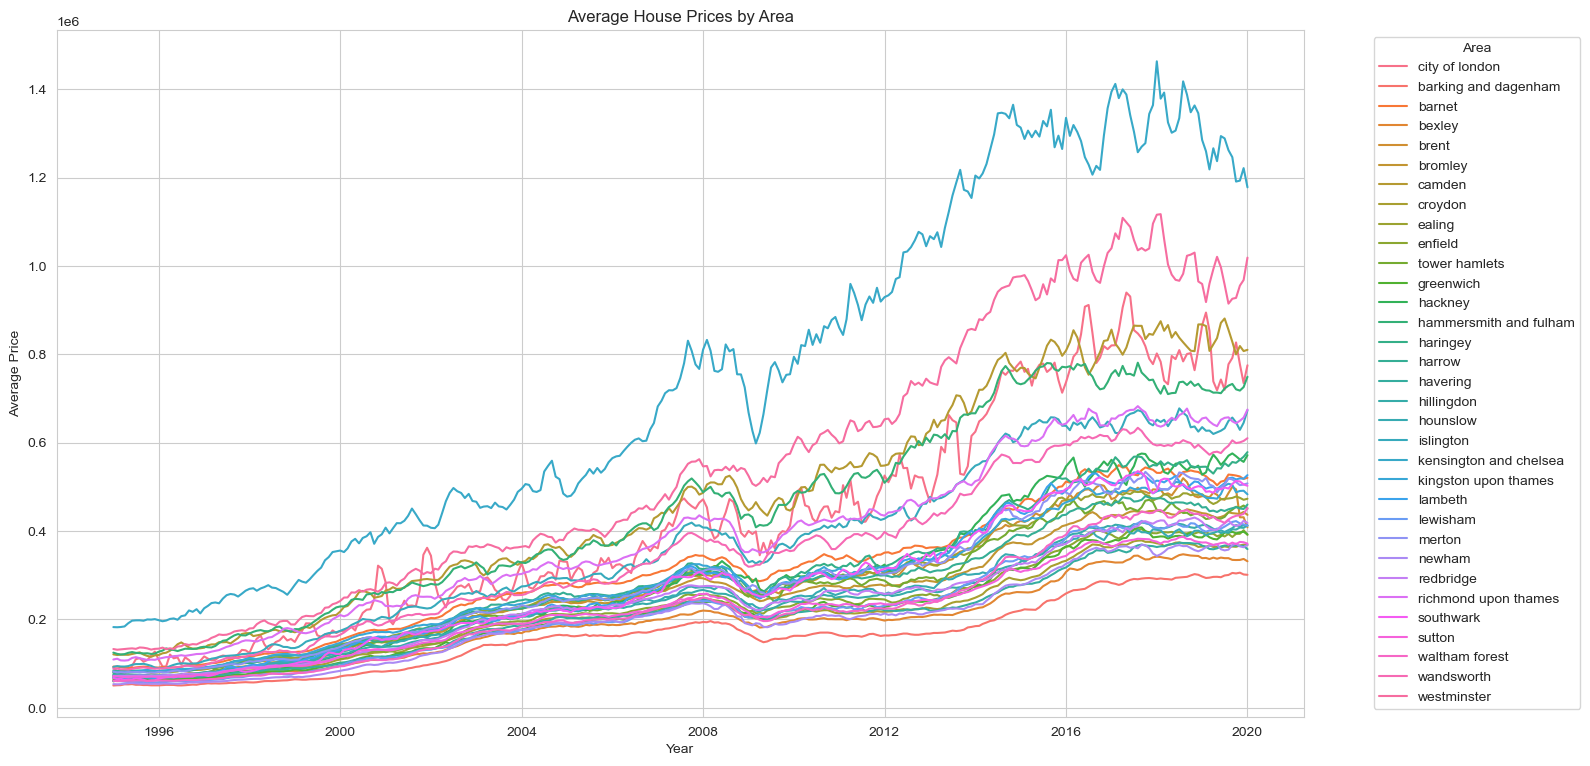

In [8]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_borough, x='date', y='average_price', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average House Prices by Area')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Only UK

In [10]:
df_other = df_monthly[df_monthly['area'].isin(other_areas)]

# Convert the 'date' column to a datetime object
df_other['date'] = pd.to_datetime(df_other.loc[:,'date'])

# Set the 'date' column as the index
df_other.set_index('date', inplace=True)

/var/folders/gj/59pyxtfn1bx0l9h92bzh0hhw0000gn/T/ipykernel_98405/696171556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['date'] = pd.to_datetime(df_other.loc[:,'date'])


/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


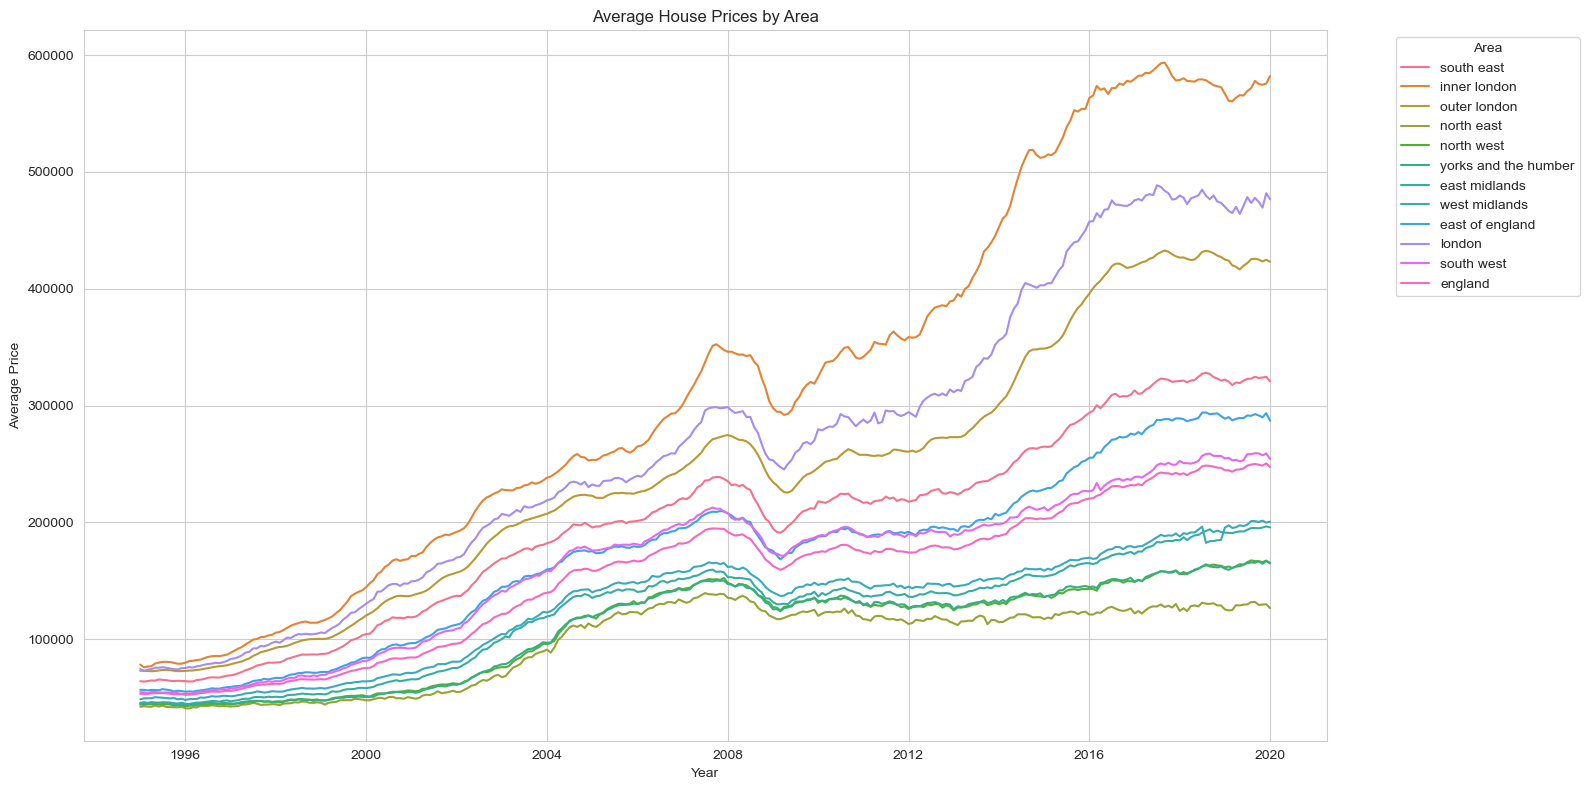

In [11]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_other, x='date', y='average_price', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average House Prices by Area')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Lets look at salaries!

In [12]:
# Filter the DataFrame to include only 'inner london'
df_borough_yearly = df_yearly[df_yearly['area'].isin(london_areas)]
df_other_yearly = df_yearly[df_yearly['area'].isin(other_areas)]

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


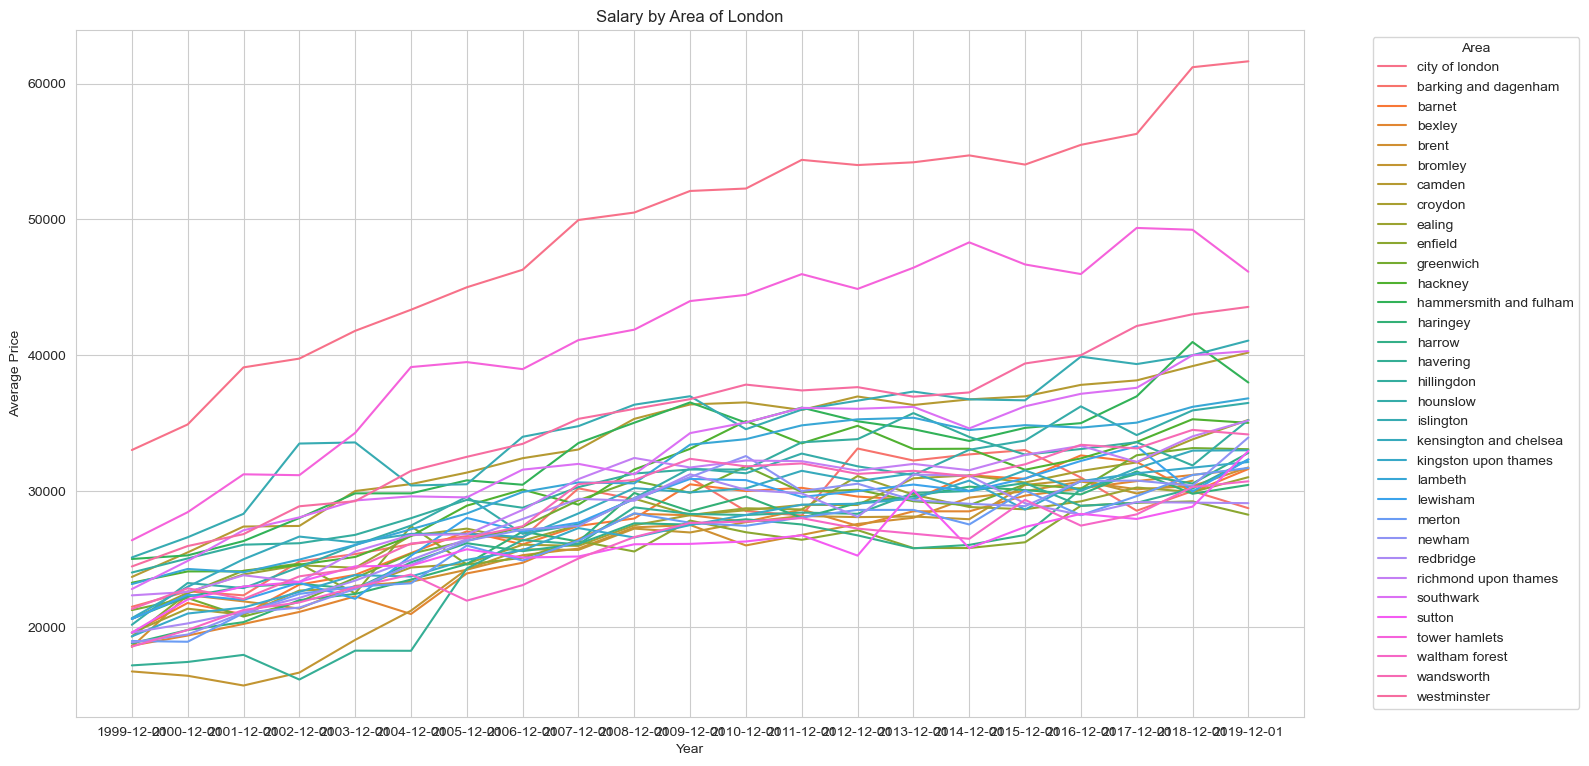

In [13]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_borough_yearly, x='date', y='median_salary', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Salary by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


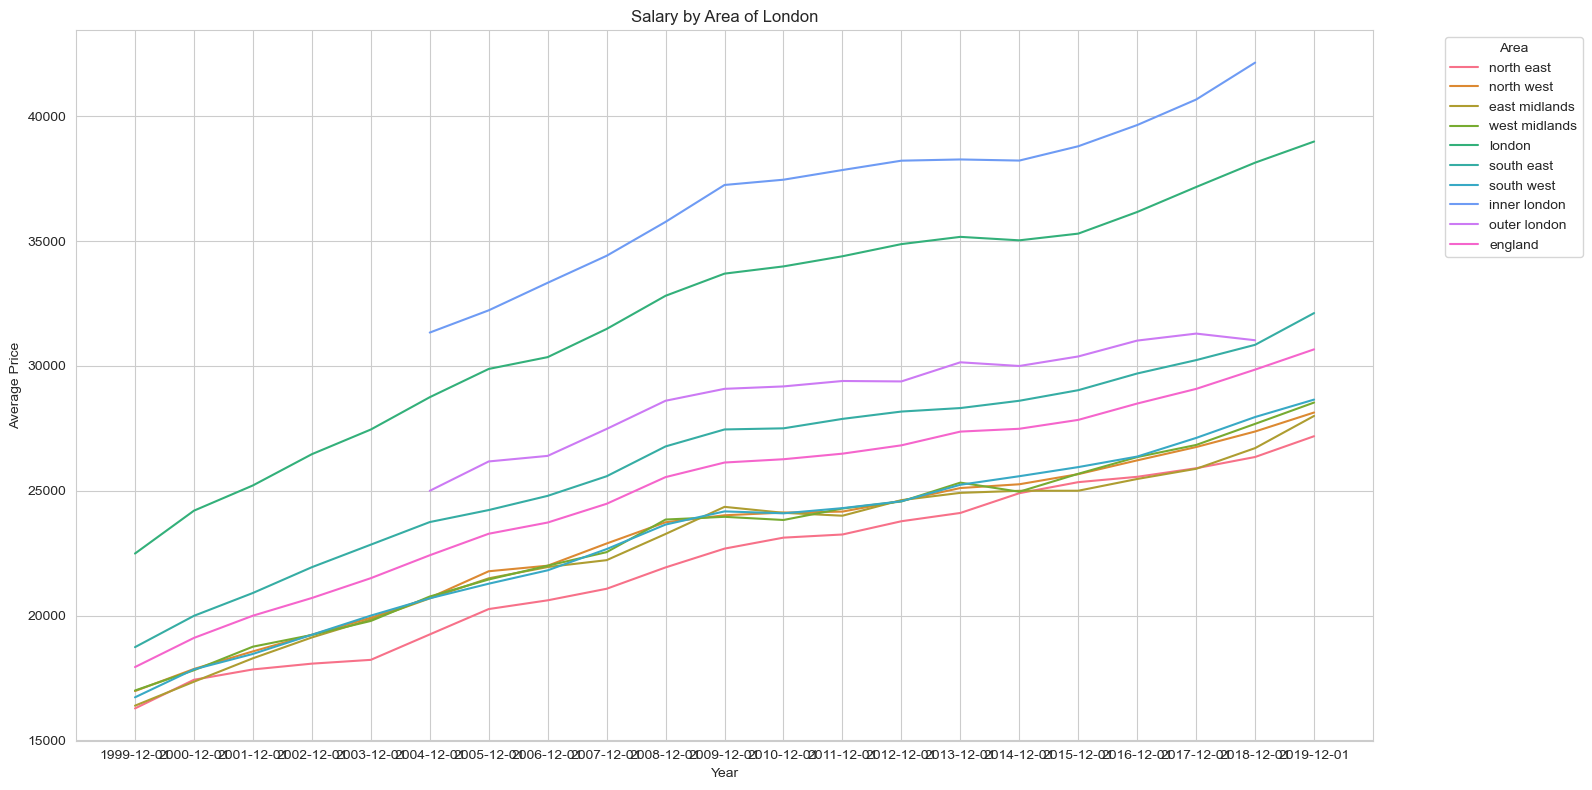

In [14]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_other_yearly, x='date', y='median_salary', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Salary by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Lets look at crime!

In [15]:
df_monthly_crimes = df_monthly[['date','no_of_crimes','area']]
df_monthly_crimes = df_monthly_crimes[df_monthly_crimes['area'].isin(london_areas)]
# no data for crime in 'city of london'
df_monthly_crimes = df_monthly_crimes[df_monthly_crimes['area'] != 'city of london']

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


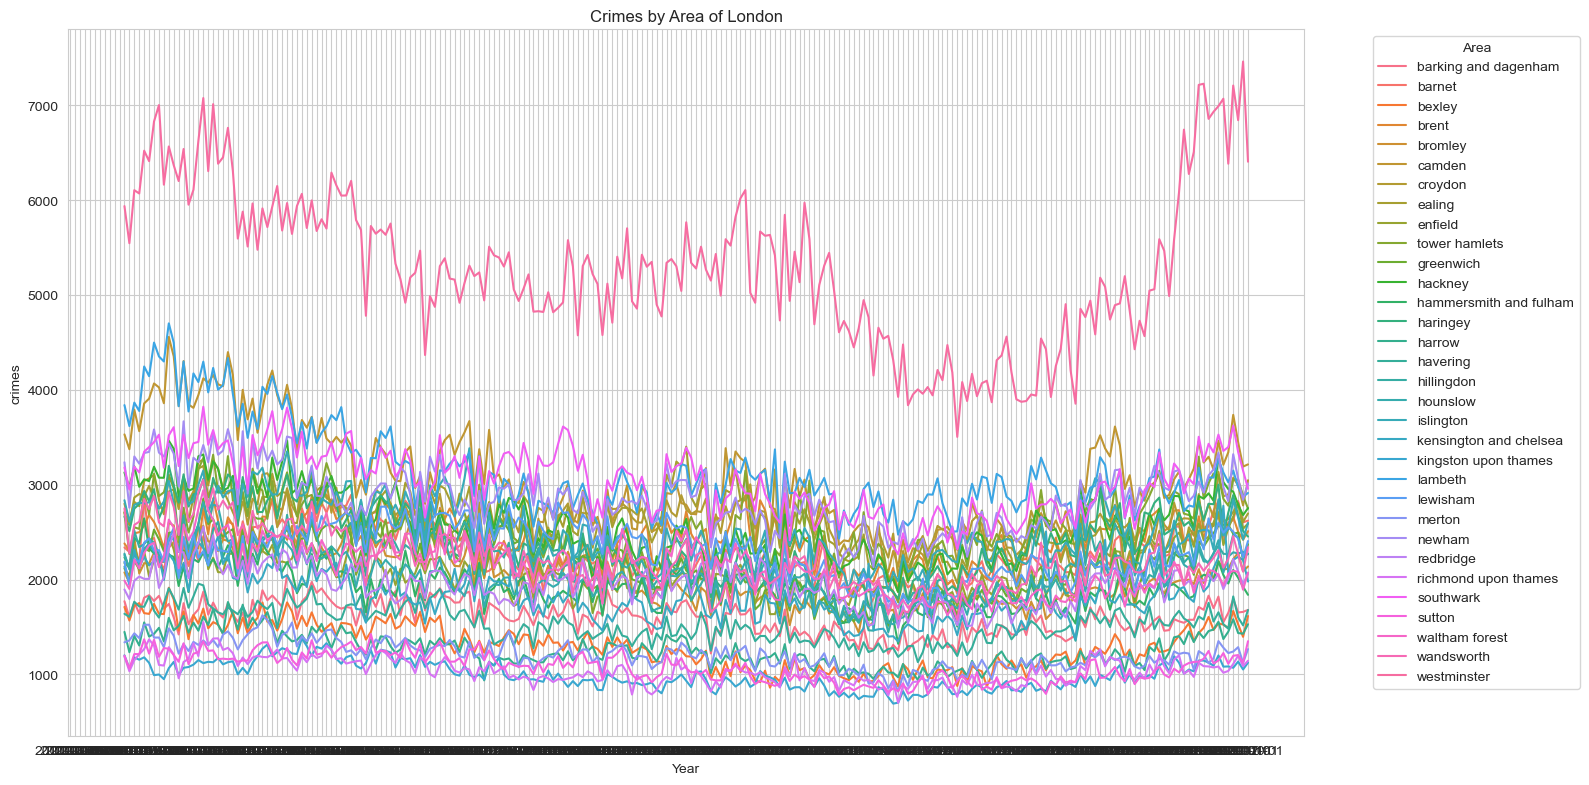

In [16]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_monthly_crimes, x='date', y='no_of_crimes', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('crimes')
plt.title('Crimes by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Get total yearly crimes per borough 

In [22]:
df_monthly_crimes['date'] = pd.to_datetime(df_monthly_crimes['date'].dropna())

# Extract the year from the 'date' column and create a new column 'year'
df_monthly_crimes['year'] = df_monthly_crimes['date'].dt.year

# Group the DataFrame by 'area' and 'year', then sum the 'no_of_crimes' for each group
area_yearly_crimes = df_monthly_crimes.groupby(['area', 'year'])['no_of_crimes'].sum().reset_index()

## Lets look at borough populations!

In [19]:
# Get the yearly areas that have population stats

df_borough_yearly['date'] = pd.to_datetime(df_borough_yearly['date'])
df_borough_yearly['year'] = df_borough_yearly['date'].dt.year
df_borough_yearly = df_borough_yearly[df_borough_yearly['year'] >= 2001]
df_borough_yearly = df_borough_yearly[df_borough_yearly['area'] != 'city of london']

### Plot the population per area 

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


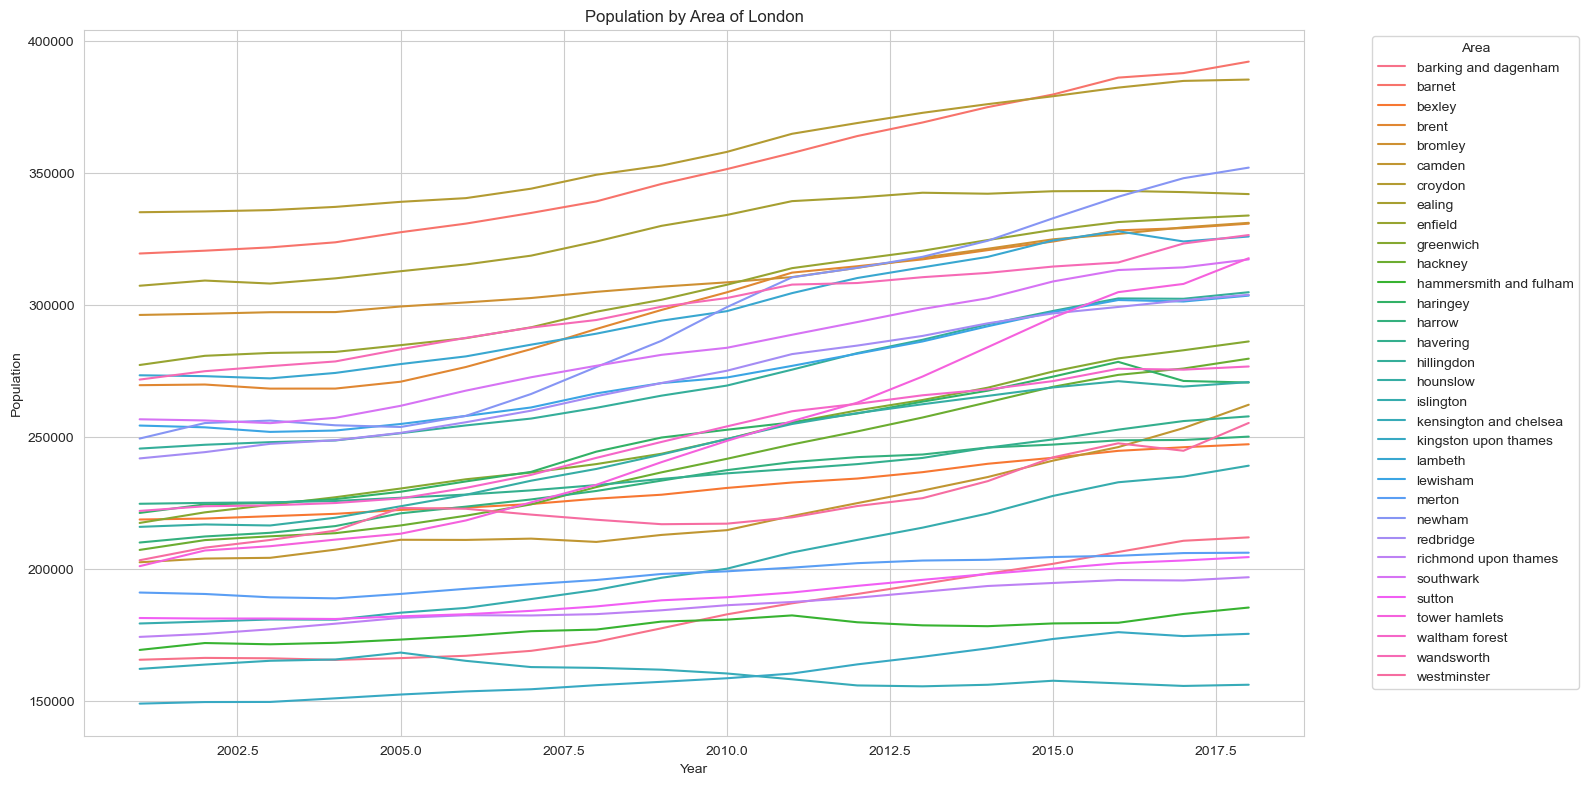

In [20]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_borough_yearly, x='year', y='population_size', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculate Crime rate

Crime Rate = population / number of crimes (per year)

In [24]:
# Get the crime rate per area and year
df_crimes_merged = pd.merge(df_borough_yearly, area_yearly_crimes, on=['area','year'])
df_crimes_merged['crime_rate'] = df_crimes_merged['population_size'] / df_crimes_merged['no_of_crimes']


/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


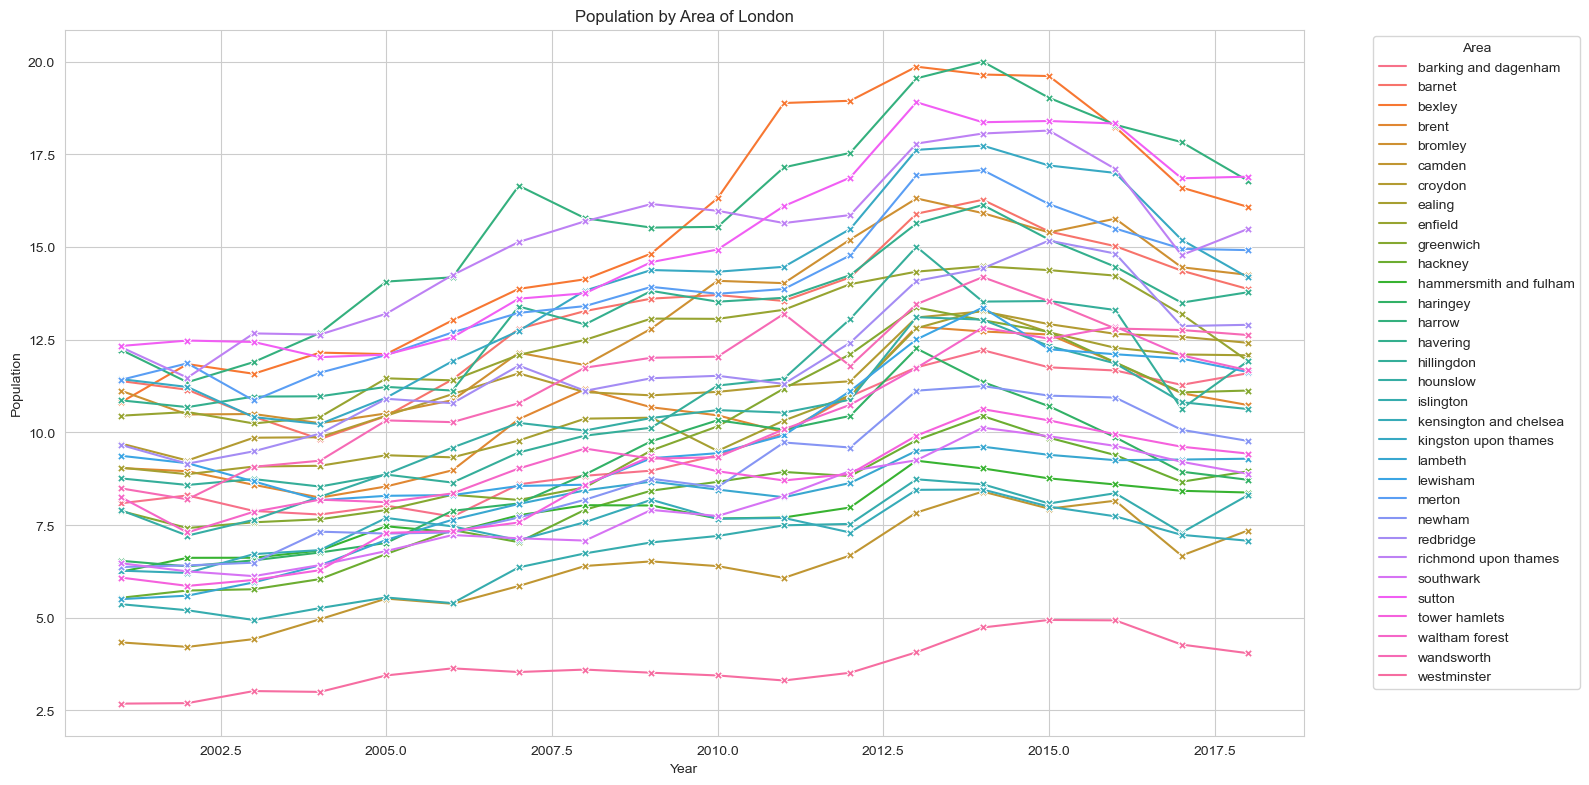

In [25]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_crimes_merged, x='year', y='crime_rate', hue='area', marker='X', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlations

Prepare monthly statistics, such as crime, house prices and houses

In [43]:
df_monthly_london = df_monthly[df_monthly['area'].isin(london_areas)].drop(columns=['code','borough_flag'])
df_monthly_london = df_monthly_london[df_monthly_london['area'] != 'city of london']

df_monthly_london['date'] = pd.to_datetime(df_monthly_london['date'])
df_monthly_london['year'] = df_monthly_london['date'].dt.year

# Group the DataFrame by 'area' and 'year', then sum the 'no_of_crimes' for each group
area_yearly_crimes = df_monthly_london.groupby(['area', 'year'])['no_of_crimes'].sum().reset_index()

# Get the yearly average house price per area
yearly_average_price = df_monthly_london.groupby(['year','area'])['average_price'].mean().reset_index()

# Get the yearly amount of houses sold per area
yearly_houses_sold = df_monthly_london.groupby(['year','area'])['houses_sold'].sum().reset_index()

# Merge these and perform analysis
df_merged = pd.merge(area_yearly_crimes, yearly_average_price, on=['year', 'area'], how='outer')
df_merged = pd.merge(df_merged, yearly_houses_sold, on=['year', 'area'], how='outer')

In [44]:
df_merged.head()

,area,year,no_of_crimes,average_price,houses_sold
0,barking and dagenham,1995,0.0,51818.000000,1476.0
1,barking and dagenham,1996,0.0,51718.250000,1881.0
2,barking and dagenham,1997,0.0,55974.250000,2434.0
3,barking and dagenham,1998,0.0,60285.750000,2496.0
4,barking and dagenham,1999,0.0,65320.833333,2686.0


Prepare yearly statistics, such as yearly salary and population sizes

In [45]:
df_yearly_london = df_yearly[df_yearly['area'].isin(london_areas)].drop(columns=['code','life_satisfaction', 'recycling_pct', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag'])
df_yearly_london = df_yearly_london[df_yearly_london['area'] != 'city of london']

df_yearly_london['date'] = pd.to_datetime(df_yearly_london['date'])
df_yearly_london['year'] = df_yearly_london['date'].dt.year
df_yearly_london = df_yearly_london.drop(columns='date')

In [46]:
df_yearly_london.head()

,area,median_salary,mean_salary,population_size,year
1,barking and dagenham,21480.0,23620.0,162444.0,1999
2,barnet,19568.0,23128.0,313469.0,1999
3,bexley,18621.0,21386.0,217458.0,1999
4,brent,18532.0,20911.0,260317.0,1999
5,bromley,16720.0,21293.0,294902.0,1999


### Build a Correlation Matrix

In [47]:
df_yearly_merged = pd.merge(df_merged, df_yearly_london, on=['year', 'area'], how='outer').dropna()

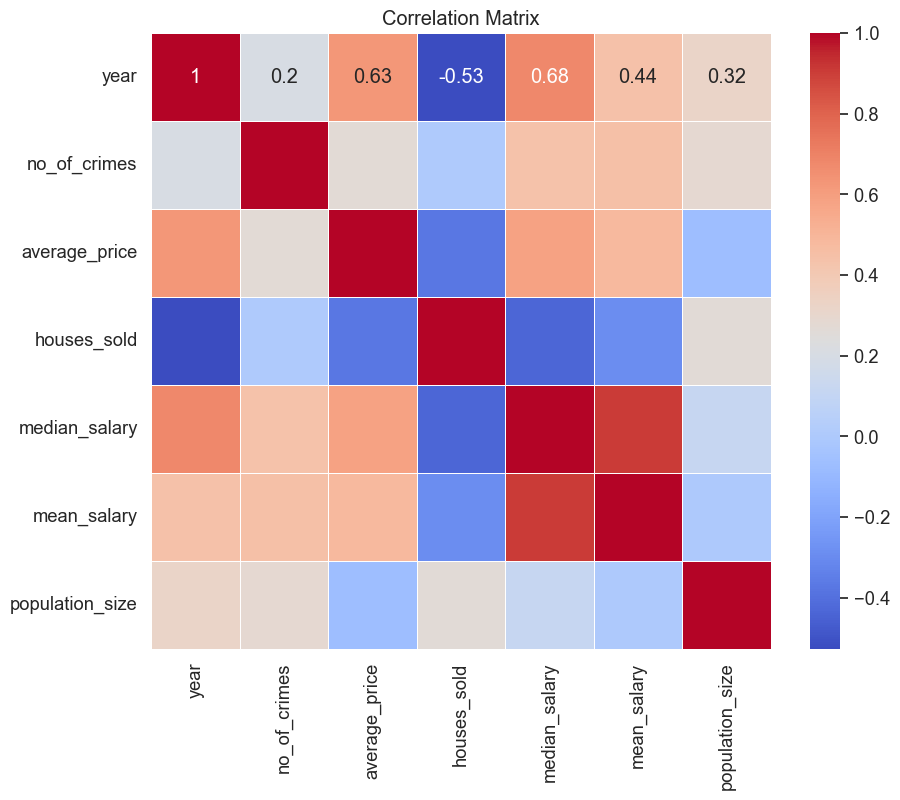

In [48]:
correlation_matrix = df_yearly_merged.drop(columns='area').corr()

# Set up the Seaborn plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix')
plt.show()

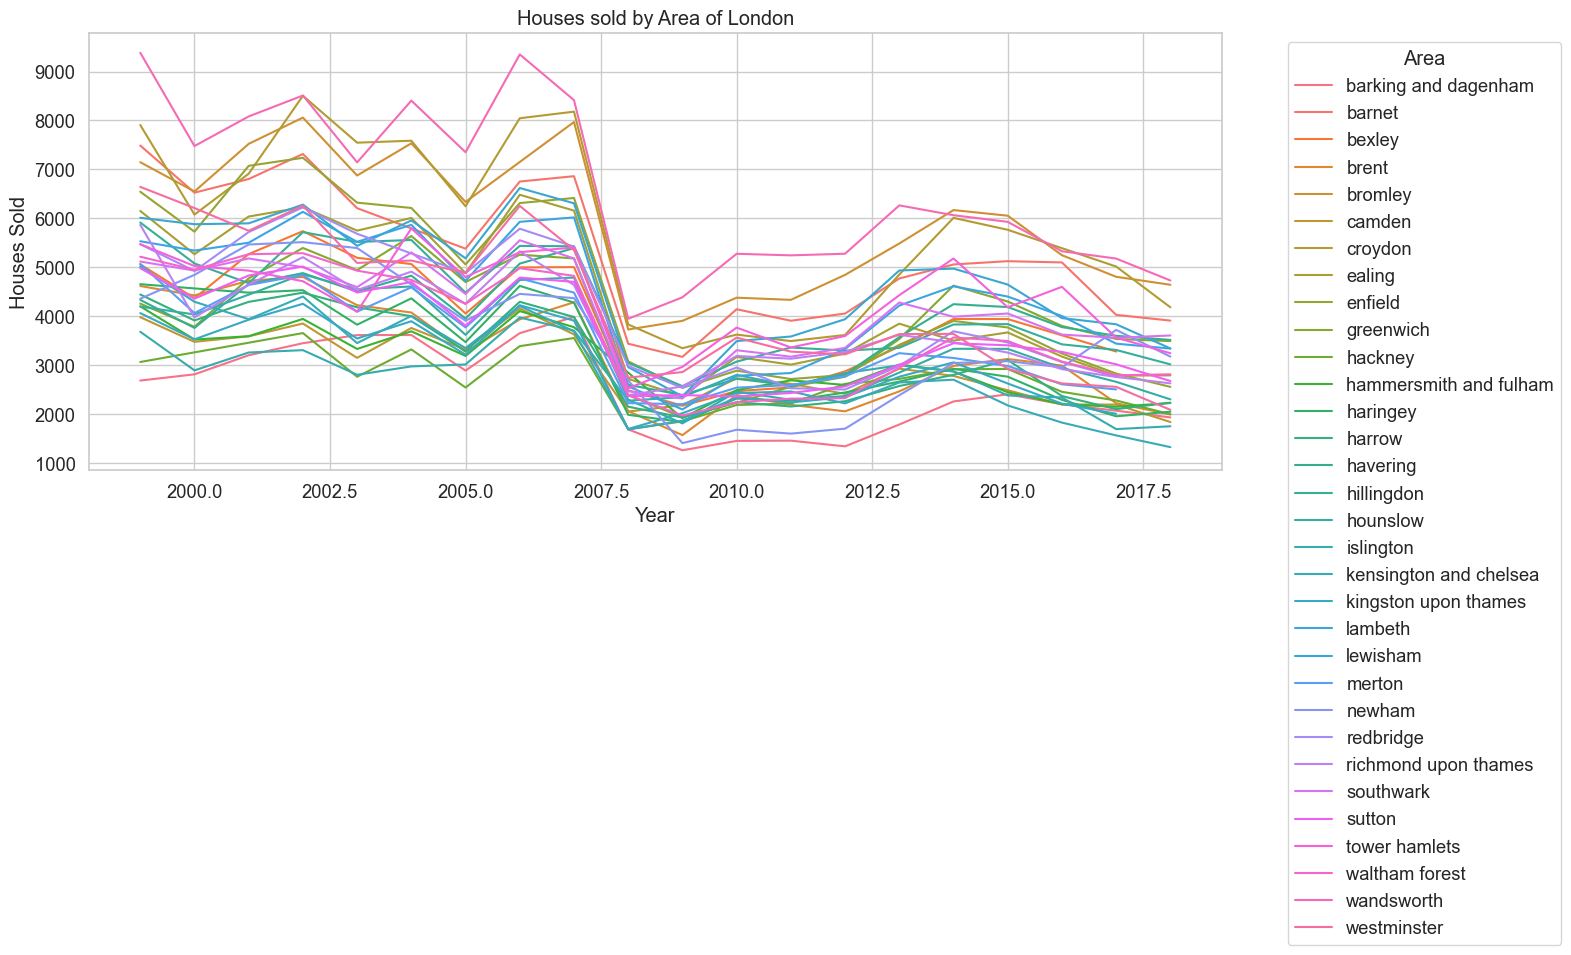

In [86]:
# Set a large figure size
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Create a Seaborn lineplot with 'area' as hue to automatically assign colors
sns.set_palette("husl")  # You can change the palette if needed

# Plot the data using Seaborn
sns.lineplot(data=df_yearly_merged, x='year', y='houses_sold', hue='area', legend='full')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Houses Sold')
plt.title('Houses sold by Area of London')

# Show the legend
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### Prepare Save data to look at Specific Borough

In [97]:
df_yearly_camden = df_yearly_merged[df_yearly_merged['area'] == 'camden']

In [100]:
df_yearly_camden.to_csv('./data/camden_yearly.csv')